# House Price - Linear Regression

## Parte 03 - Machine Learning - Rodagem com todas as variaveis

#### > Importação das Bibliotecas

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd  
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.formula.api import ols
from xgboost import XGBRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### > Carregamento do Dataset

Carregamento do dataset **'house_data.csv'**. O comando 'set_option' permite que a tabela seja apresentada sem simplicação 

In [3]:
df0 = pd.read_csv('house_data.csv')
pd.set_option('max_columns', None)

#### 1. Primeira Rodagem

Nessa primeira rodagem, serão colocados todos os dados do dataset, com a intenção de prever o preço da casa

##### > Separando os Dados

Colocando todas as colunas como variaveis

In [4]:
df = df0.copy()

In [5]:
df.columns

Index(['date', 'day', 'month', 'year', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'age_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   day            21613 non-null  int64  
 2   month          21613 non-null  int64  
 3   year           21613 non-null  int64  
 4   price          21613 non-null  float64
 5   bedrooms       21613 non-null  int64  
 6   bathrooms      21613 non-null  float64
 7   sqft_living    21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  view           21613 non-null  int64  
 12  condition      21613 non-null  int64  
 13  grade          21613 non-null  int64  
 14  sqft_above     21613 non-null  int64  
 15  sqft_basement  21613 non-null  int64  
 16  age_built      21613 non-null  int64  
 17  yr_renovated   21613 non-null  int64  
 18  zipcod

Transformando os tipos de variaveis

In [7]:
df['date']=df['date'].astype('datetime64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   day            21613 non-null  int64         
 2   month          21613 non-null  int64         
 3   year           21613 non-null  int64         
 4   price          21613 non-null  float64       
 5   bedrooms       21613 non-null  int64         
 6   bathrooms      21613 non-null  float64       
 7   sqft_living    21613 non-null  int64         
 8   sqft_lot       21613 non-null  int64         
 9   floors         21613 non-null  float64       
 10  waterfront     21613 non-null  int64         
 11  view           21613 non-null  int64         
 12  condition      21613 non-null  int64         
 13  grade          21613 non-null  int64         
 14  sqft_above     21613 non-null  int64         
 15  sqft_basement  2161

Colocando as features em uma variavel

In [9]:
X = df[['day', 'month', 'year', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'age_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Colocando a coluna 'price' como nossa variavel resposta

In [10]:
y = df['price']

Realizando a separação dos dados em Treino e Teste, onde 30% dos dados serão de teste

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Metrica para validação dos dados

In [12]:
def acc_reg(y_pred,y_test,tolerancia):
    
    df_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    df_final['error']=1-df_final['Predicted']/df_final['Actual']
    
    ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()
    
    Falso = ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()[0]
    
    Verdadeiro = ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()[1]
    
    Acc = Verdadeiro/(Falso+Verdadeiro)*100
    
    return round(Acc,2)

#### > LinearRegression

##### > Verificação dos resultados

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lrr = r2_score(y_test, y_pred)
MAElr = mean_absolute_error(y_test, y_pred)
MSElr = mean_squared_error(y_test, y_pred)
RMSElr = np.sqrt(mean_squared_error(y_test, y_pred))
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print('R^2: %.2f ' % lrr)
print('Mean Absolute error:', MAElr)
print('Mean Squared error:', MSElr )
print('Root Mean Squared Error:', RMSElr )

Coefficient: [-3.47904822e+02  1.13920027e+03  3.35240754e+04 -3.45002445e+04
  4.46457817e+04  1.09075885e+02  8.58748177e-02  7.52014443e+03
  5.63025998e+05  5.34117431e+04  2.58473178e+04  9.47238693e+04
  7.00250182e+01  3.90508664e+01  2.67552983e+03  2.16391286e+01
 -5.53708536e+02  5.98270535e+05 -1.95001857e+05  2.13477786e+01
 -3.27377685e-01]
Intercept: -66310248.64623741
R^2: 0.70 
Mean Absolute error: 126929.17347038178
Mean Squared error: 44951491944.93573
Root Mean Squared Error: 212017.6689451512


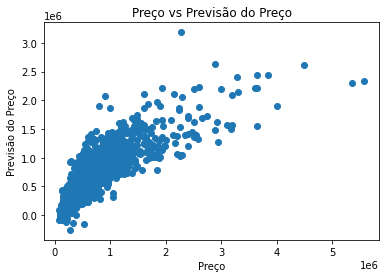

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [15]:
lrp = acc_reg(y_pred,y_test,0.1)
lrp

28.57

In [16]:
Linear = ['LinearRegression',lrr,MAElr,MSElr,RMSElr,lrp]
Linear

['LinearRegression',
 0.7026559760833999,
 126929.17347038178,
 44951491944.93573,
 212017.6689451512,
 28.57]

#### > KNN Regressor

##### > Verificação dos resultados

In [17]:
knn = KNeighborsRegressor(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knnr = r2_score(y_test, y_pred)
MAEknn = mean_absolute_error(y_test, y_pred)
MSEknn = mean_squared_error(y_test, y_pred)
RMSEknn = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % knnr)
print('Mean Absolute error:', MAEknn)
print('Mean Squared error:', MSEknn )
print('Root Mean Squared Error:', RMSEknn )

R^2: 0.50 
Mean Absolute error: 164958.10242886882
Mean Squared error: 75047725156.76462
Root Mean Squared Error: 273948.3987118096


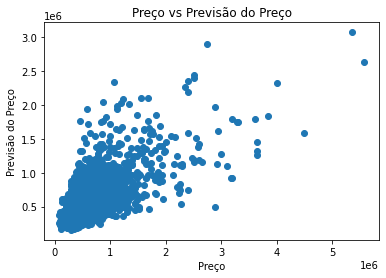

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [19]:
knnp = acc_reg(y_pred,y_test,0.1)
knnp

22.25

In [20]:
KNN = ['KNN Regressor',knnr,MAEknn,MSEknn,RMSEknn,knnp]
KNN

['KNN Regressor',
 0.5035761524615321,
 164958.10242886882,
 75047725156.76462,
 273948.3987118096,
 22.25]

#### > Decision Tree

##### > Verificação dos resultados

In [21]:
dct = DecisionTreeRegressor(random_state=42)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
dtr = r2_score(y_test, y_pred)
MAEdt = mean_absolute_error(y_test, y_pred)
MSEdt = mean_squared_error(y_test, y_pred)
RMSEdt = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % dtr)
print('Mean Absolute error:', MAEdt)
print('Mean Squared error:', MSEdt )
print('Root Mean Squared Error:', RMSEdt )

R^2: 0.70 
Mean Absolute error: 106339.26856349756
Mean Squared error: 44855277426.120285
Root Mean Squared Error: 211790.6452752819


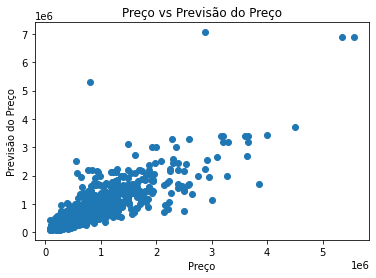

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [23]:
dtp = acc_reg(y_pred,y_test,0.1)
dtp

40.64

In [24]:
DT = ['Decision Tree',dtr,MAEdt,MSEdt,RMSEdt,dtp]
DT

['Decision Tree',
 0.7032924135173082,
 106339.26856349756,
 44855277426.120285,
 211790.6452752819,
 40.64]

#### > Random Forest

##### > Verificação dos resultados

In [25]:
rft = RandomForestRegressor(n_estimators=100, random_state=26)
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
rfr = r2_score(y_test, y_pred)
MAErf = mean_absolute_error(y_test, y_pred)
MSErf = mean_squared_error(y_test, y_pred)
RMSErf = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % rfr)
print('Mean Absolute error:', MAErf)
print('Mean Squared error:', MSErf )
print('Root Mean Squared Error:', RMSErf )

R^2: 0.87 
Mean Absolute error: 72748.30682627804
Mean Squared error: 20155891671.116276
Root Mean Squared Error: 141971.44667543637


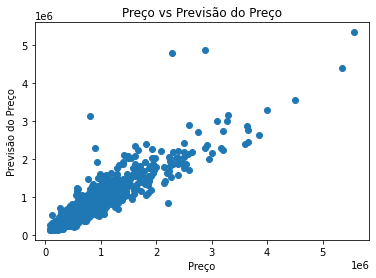

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [27]:
rfp = acc_reg(y_pred,y_test,0.1)
rfp

54.71

In [28]:
RF = ['Random Forest',rfr,MAErf,MSErf,RMSErf,rfp]
RF

['Random Forest',
 0.8666733032474576,
 72748.30682627804,
 20155891671.116276,
 141971.44667543637,
 54.71]

#### > Bagging

##### > Verificação dos resultados

In [29]:
bag_base = DecisionTreeRegressor(random_state=26)
bag = BaggingRegressor(base_estimator=bag_base, n_estimators=10, random_state=26)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
bagr = r2_score(y_test, y_pred)
MAEbag = mean_absolute_error(y_test, y_pred)
MSEbag = mean_squared_error(y_test, y_pred)
RMSEbag = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % bagr)
print('Mean Absolute error:', MAEbag)
print('Mean Squared error:', MSEbag )
print('Root Mean Squared Error:', RMSEbag)

R^2: 0.84 
Mean Absolute error: 76903.42482072634
Mean Squared error: 23714832014.083797
Root Mean Squared Error: 153996.20779124333


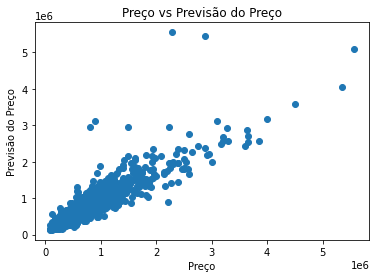

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [31]:
bagp = acc_reg(y_pred,y_test,0.1)
bagp

51.75

In [32]:
BAG = ['Bagging',bagr,MAEbag,MSEbag,RMSEbag,bagp]
BAG

['Bagging',
 0.8431317121529198,
 76903.42482072634,
 23714832014.083797,
 153996.20779124333,
 51.75]

#### > Ensemble

##### > Verificação dos resultados

In [33]:
rft2 = RandomForestRegressor(n_estimators=10, random_state=26)
ens = VotingRegressor([('LR', lr), ('RF', rft2)])
ens.fit(X_train, y_train)
y_pred = ens.predict(X_test)
ensr = r2_score(y_test, y_pred)
MAEens = mean_absolute_error(y_test, y_pred)
MSEens = mean_squared_error(y_test, y_pred)
RMSEens = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % ensr)
print('Mean Absolute error:', MAEens)
print('Mean Squared error:', MSEens )
print('Root Mean Squared Error:', RMSEens)

R^2: 0.82 
Mean Absolute error: 90766.41278090916
Mean Squared error: 26830119218.563725
Root Mean Squared Error: 163799.0208107598


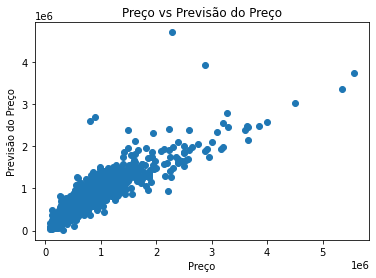

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [35]:
ensp = acc_reg(y_pred,y_test,0.1)
ensp

40.64

In [36]:
ENS = ['Ensemble',ensr,MAEens,MSEens,RMSEens,ensp]
ENS

['Ensemble',
 0.8225247869329368,
 90766.41278090916,
 26830119218.563725,
 163799.0208107598,
 40.64]

#### > Gradient Boosting Regressor

##### > Verificação dos resultados

In [37]:
gbos = GradientBoostingRegressor(max_depth=7,random_state=42)
gbos.fit(X_train, y_train)
y_pred = gbos.predict(X_test)
gbosr = r2_score(y_test, y_pred)
MAEgbos = mean_absolute_error(y_test, y_pred)
MSEgbos = mean_squared_error(y_test, y_pred)
RMSEgbos = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % gbosr)
print('Mean Absolute error:', MAEgbos)
print('Mean Squared error:', MSEgbos )
print('Root Mean Squared Error:', RMSEgbos)

R^2: 0.87 
Mean Absolute error: 68066.17668039865
Mean Squared error: 18898875031.02849
Root Mean Squared Error: 137473.17931519766


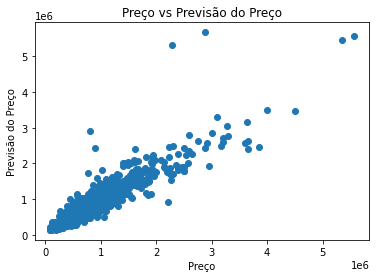

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [39]:
gbosp = acc_reg(y_pred,y_test,0.1)
gbosp

56.35

In [40]:
GBOS = ['Gradient Boosting',gbosr,MAEgbos,MSEgbos,RMSEgbos,gbosp]
GBOS

['Gradient Boosting',
 0.8749881860182381,
 68066.17668039865,
 18898875031.02849,
 137473.17931519766,
 56.35]

#### > XGBoost Regressor

##### > Verificação dos resultados

In [41]:
xgb = XGBRegressor(max_depth=4,random_state=42).fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgbr = r2_score(y_test, y_pred)
MAExgb = mean_absolute_error(y_test, y_pred)
MSExgb = mean_squared_error(y_test, y_pred)
RMSExgb = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % xgbr)
print('Mean Absolute error:', MAExgb)
print('Mean Squared error:', MSExgb )
print('Root Mean Squared Error:', RMSExgb)

R^2: 0.87 
Mean Absolute error: 72485.9115938729
Mean Squared error: 19005663693.636326
Root Mean Squared Error: 137861.0303662218


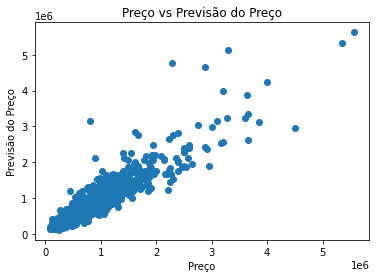

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [43]:
xgbp = acc_reg(y_pred,y_test,0.1)
xgbp

53.07

In [44]:
XGB = ['XGBoost Regressor',xgbr,MAExgb,MSExgb,RMSExgb,xgbp]
XGB

['XGBoost Regressor',
 0.8742818029979063,
 72485.9115938729,
 19005663693.636326,
 137861.0303662218,
 53.07]

#### > OLS

##### > Verificação dos resultados

In [45]:
m=ols('price~day+month+year+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+age_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2535.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:29:47   Log-Likelihood:            -2.9454e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21592   BIC:                         5.893e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.659e+07   9.97e+06     -6.678

In [46]:
Fir = pd.DataFrame([Linear,KNN,DT,RF,BAG,ENS,GBOS,XGB],columns=['TIPO','R²','MAE','MSE','RMSE','ACURACIA %'])
Fir

,TIPO,R²,MAE,MSE,RMSE,ACURACIA %
0,LinearRegression,0.702656,126929.173470,4.495149e+10,212017.668945,28.57
1,KNN Regressor,0.503576,164958.102429,7.504773e+10,273948.398712,22.25
2,Decision Tree,0.703292,106339.268563,4.485528e+10,211790.645275,40.64
3,Random Forest,0.866673,72748.306826,2.015589e+10,141971.446675,54.71
4,Bagging,0.843132,76903.424821,2.371483e+10,153996.207791,51.75
5,Ensemble,0.822525,90766.412781,2.683012e+10,163799.020811,40.64
6,Gradient Boosting,0.874988,68066.176680,1.889888e+10,137473.179315,56.35
7,XGBoost Regressor,0.874282,72485.911594,1.900566e+10,137861.030366,53.07


In [47]:
model = [lr, knn, dct, rft, bag_base, gbos, xgb]

for i in model:
    
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(i)
    print('R^2: %.2f '%r2)
    print('Mean Absolute error:', MAE)
    print('Mean Squared error:', MSE )
    print('Root Mean Squared Error:', RMSE)
    acc_reg(y_pred,y_test,0.1)
    print('--------------------------------------')
    print('=======================================')
    print('--------------------------------------')

LinearRegression()
R^2: 0.70 
Mean Absolute error: 126929.17347038178
Mean Squared error: 44951491944.93573
Root Mean Squared Error: 212017.6689451512
--------------------------------------
--------------------------------------
KNeighborsRegressor(metric='euclidean')
R^2: 0.50 
Mean Absolute error: 164958.10242886882
Mean Squared error: 75047725156.76462
Root Mean Squared Error: 273948.3987118096
--------------------------------------
--------------------------------------
DecisionTreeRegressor(random_state=42)
R^2: 0.70 
Mean Absolute error: 106339.26856349756
Mean Squared error: 44855277426.120285
Root Mean Squared Error: 211790.6452752819
--------------------------------------
--------------------------------------
RandomForestRegressor(random_state=26)
R^2: 0.87 
Mean Absolute error: 72748.30682627804
Mean Squared error: 20155891671.116276
Root Mean Squared Error: 141971.44667543637
--------------------------------------
--------------------------------------
DecisionTreeRegressor